In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

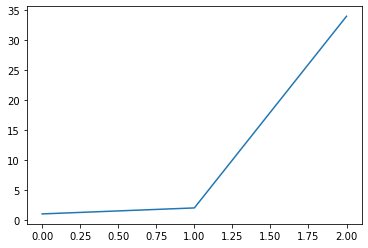

In [3]:
plt.plot([1,2,34])

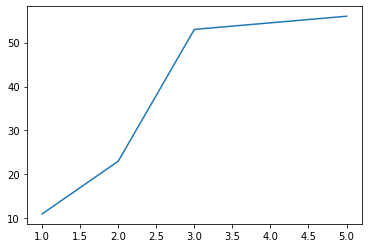

In [4]:
x = [1,2,3,5]
y = [11,23,53,56]
plt.plot(x, y)

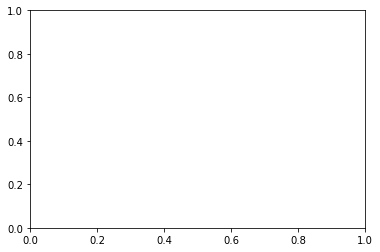

In [5]:
fig = plt.figure()
axies = fig.add_subplot() # add axies
plt.show()

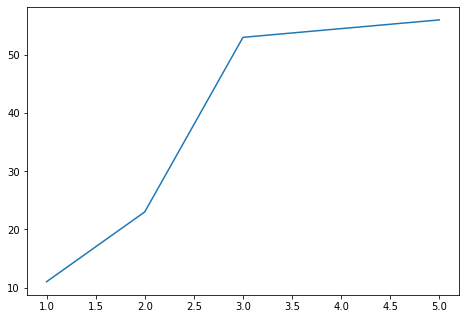

In [6]:
fig = plt.figure()
axies = fig.add_axes([1,1,1,1])
axies.plot(x, y) # add some data
plt.show()

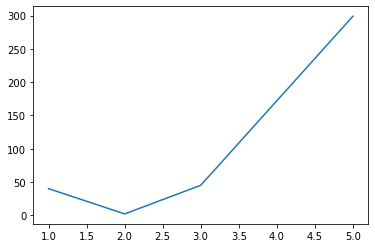

In [7]:
fig, ax = plt.subplots()
ax.plot(x, [40, 2, 45, 299])

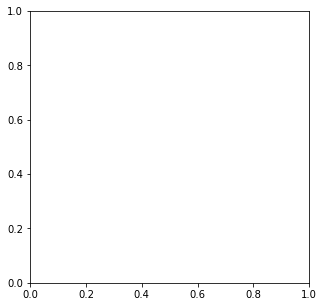

In [8]:
fix, ax = plt.subplots(figsize=(5, 5))

In [9]:
ax.plot(x, y)
# customize plot
ax.set(title="Simple plot",
        xlabel="x-axis",
        ylabel="y-axis")
#save and show
fig.savefig('./sample-plot.png')

making figures with numpy arrays
* line plot
* scatter
* bar
* hist
* subplot

In [10]:
x = np.linspace(0, 10, 100)


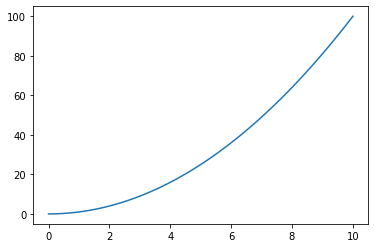

In [11]:
# create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2)

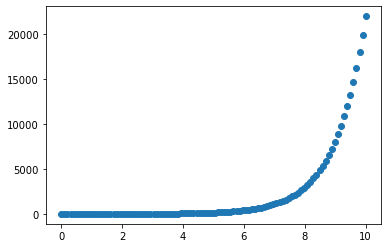

In [12]:
# same data, but scatterplot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))

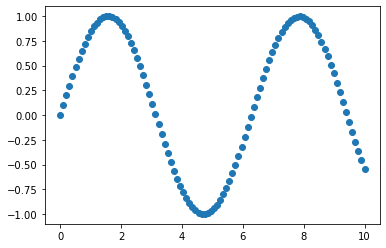

In [13]:
fix, ax = plt.subplots()
ax.scatter(x, np.sin(x));

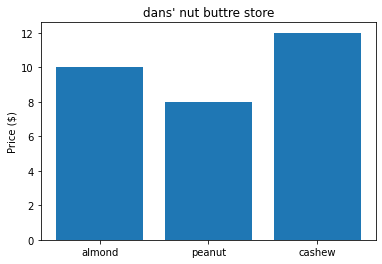

In [14]:
# make a plot from dictionary
nut_butter_prices = {"almond": 10,
                        "peanut": 8,
                        "cashew": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="dans' nut buttre store",
        ylabel="Price ($)");

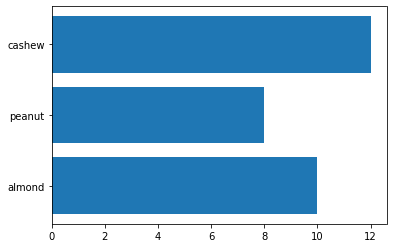

In [15]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

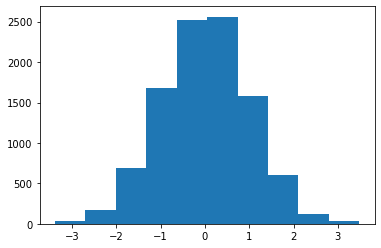

In [16]:
x = np.random.randn(10000)
fig, ax = plt.subplots()
ax.hist(x);

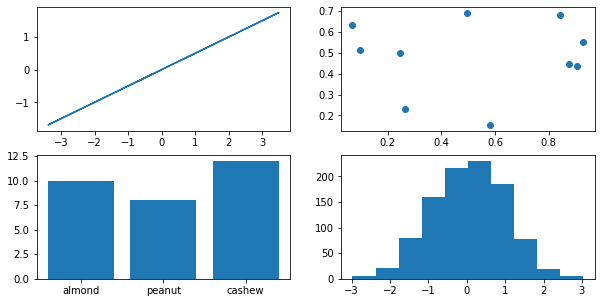

In [17]:
# subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# plot to each diffrent axis
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(np.random.randn(1000));

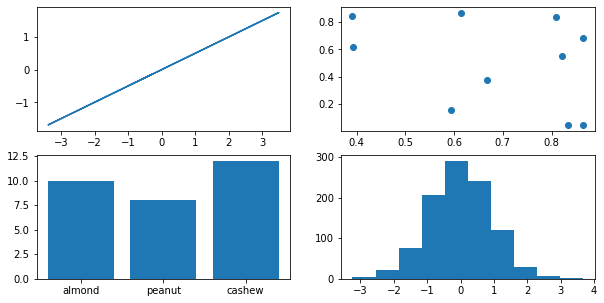

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1, 1].hist(np.random.randn(1000));

<h1>Plotting from panda DataFrames

In [19]:
# make a DataFrame
car_sales = pd.read_csv("./050 car-sales.csv")

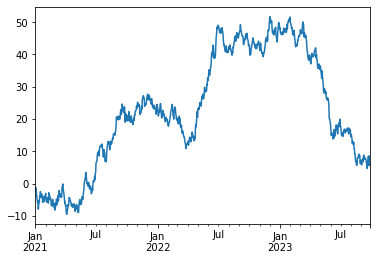

In [20]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2021',periods=1000))
ts = ts.cumsum()
ts.plot();

In [21]:
car_sales["Price"] = car_sales['Price'].str.replace('[\$\,\.]', '')

<ipython-input-21-1875863d4882>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales['Price'].str.replace('[\$\,\.]', '')


In [22]:
car_sales["Price"] = car_sales["Price"].str[:-2]


In [23]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))

In [24]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales["Total Sales"] = car_sales["Price"].cumsum()

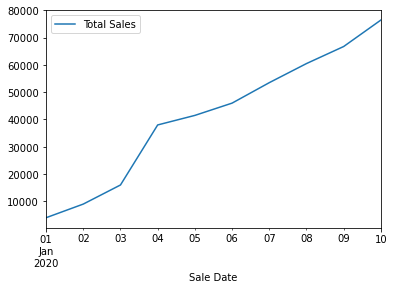

In [25]:
# plot total sales
car_sales.plot(x='Sale Date', y="Total Sales");

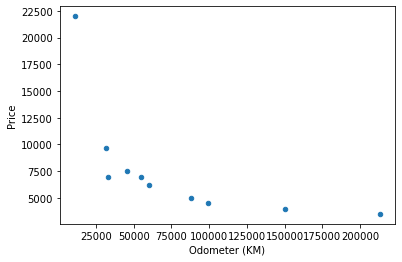

In [26]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [27]:
# bar graph
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

<AxesSubplot:>

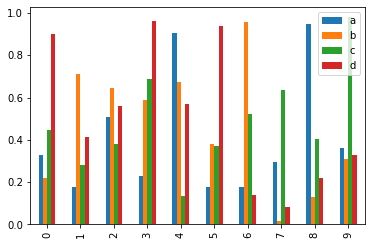

In [28]:
df.plot.bar()

<AxesSubplot:>

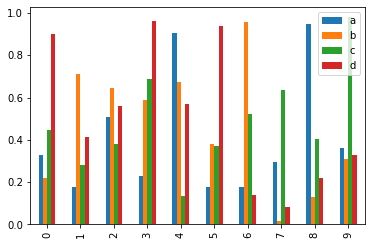

In [29]:
df.plot(kind='bar')

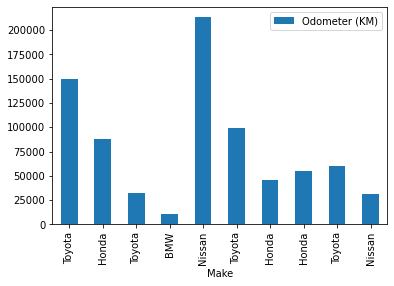

In [30]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

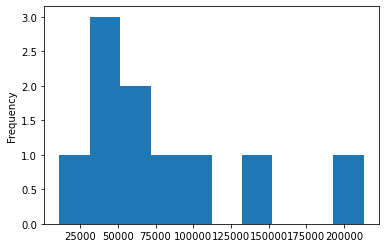

In [31]:
# histograms
car_sales["Odometer (KM)"].plot.hist();

<AxesSubplot:ylabel='Frequency'>

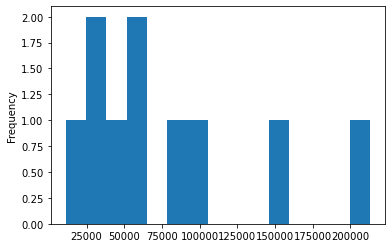

In [32]:
car_sales["Odometer (KM)"].plot.hist(bins=15)

In [33]:
heart_desiase = pd.read_csv("./041 heart-disease.csv")


<AxesSubplot:>

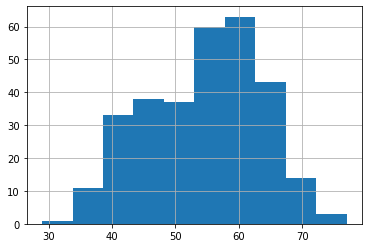

In [34]:
heart_desiase['age'].hist()

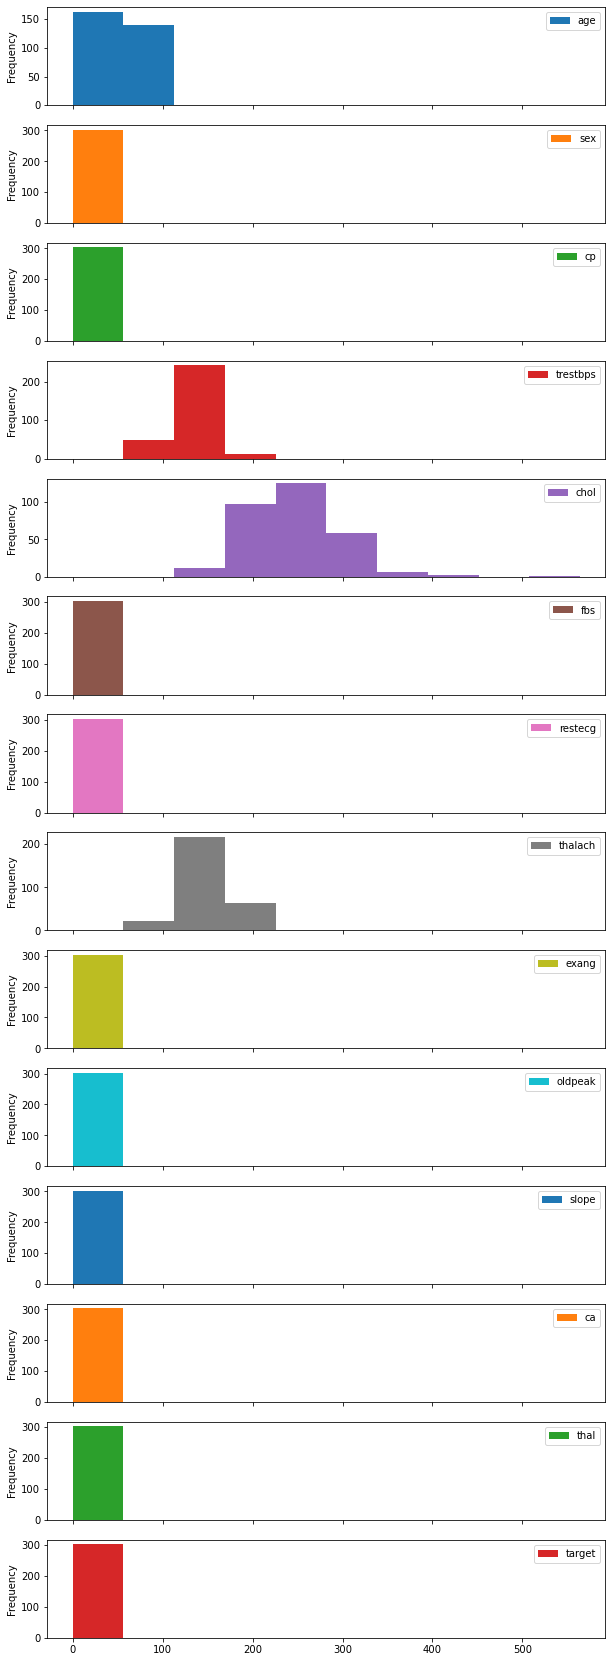

In [35]:
heart_desiase.plot.hist(figsize=(10, 30), subplots=True);

# simple plotting use pyplot
# plotting more advanced, use the OO method

In [36]:
over_50 = heart_desiase[heart_desiase['age'] > 50]

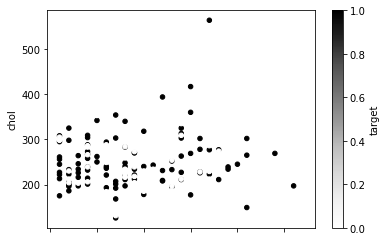

In [37]:
over_50.plot(kind='scatter', x='age', y='chol', c='target');

(45.0, 100.0)

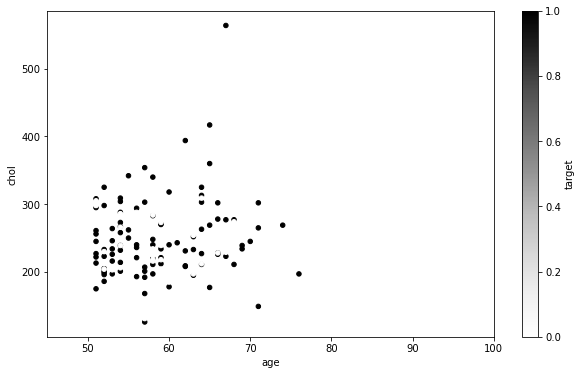

In [38]:
# OO method
fix, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', x='age', y='chol', c='target', ax=ax);
ax.set_xlim([45, 100])

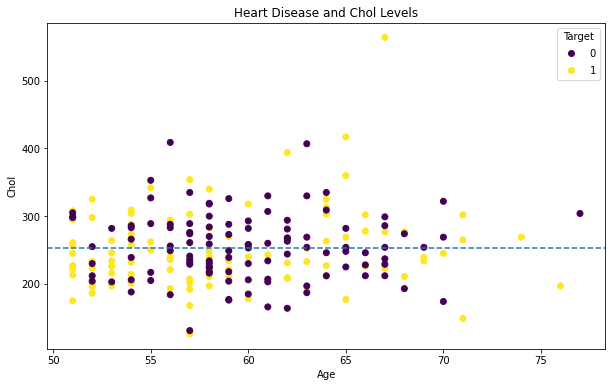

In [39]:
fix, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=over_50["age"], y=over_50['chol'], c=over_50['target'])
ax.set(title="Heart Disease and Chol Levels", xlabel="Age", ylabel="Chol");
# add a legend
ax.legend(*scatter.legend_elements(), title="Target")
# add a horizontal line
ax.axhline(over_50['chol'].mean(), linestyle='--');

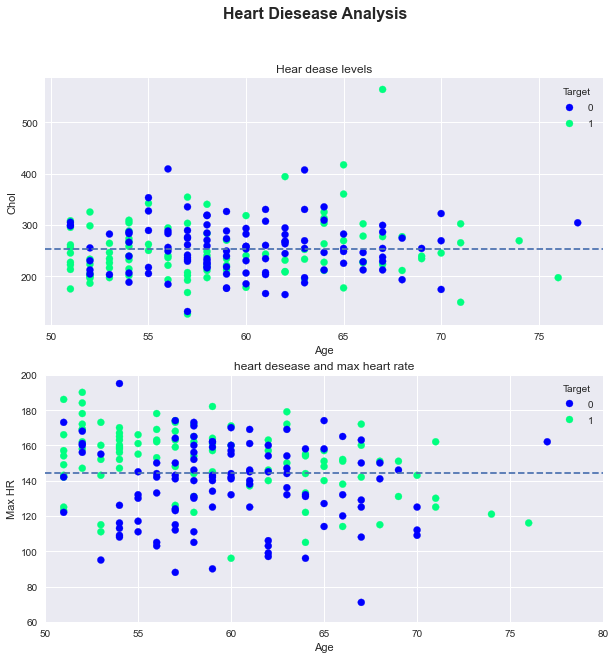

In [40]:
# set the style
plt.style.use('seaborn')

# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

#add data to ax0
scatter = ax0.scatter(x=over_50["age"], y=over_50['chol'], c=over_50['target'],
                cmap='winter') # change the color scheme
ax0.set(title='Hear dease levels', xlabel='Age', ylabel='Chol')

#add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")
ax0.axhline(y=over_50['chol'].mean(), linestyle='--');


#add data to ax1
scatter = ax1.scatter(x=over_50['age'], y=over_50['thalach'], c=over_50['target'],
                cmap='winter')
ax1.set_xlim([50, 80])
ax1.set_ylim([60, 200])
ax1.set(title='heart desease and max heart rate', xlabel='Age', ylabel='Max HR')

ax1.legend(*scatter.legend_elements(), title="Target")
ax1.axhline(y=over_50['thalach'].mean(), linestyle='--');

# add a titile to the figure
fig.suptitle("Heart Diesease Analysis", fontsize=16, fontweight='bold');

# save 
fig.savefig("./lolkek.png")

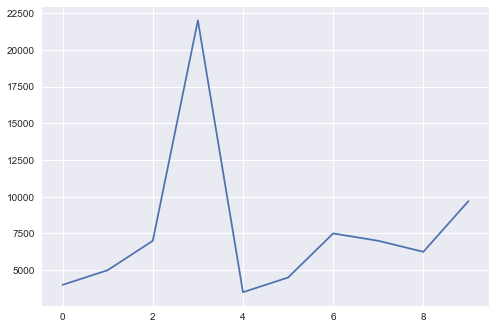

In [41]:
car_sales["Price"].plot();

In [42]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [43]:
plt.style.use('seaborn')

<AxesSubplot:>

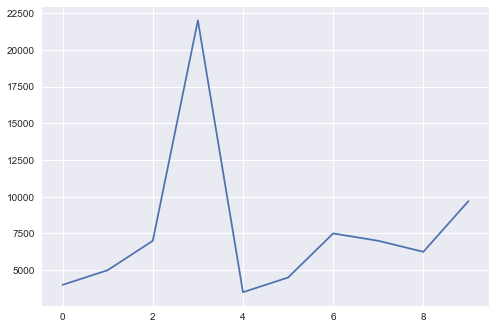

In [44]:
car_sales['Price'].plot()

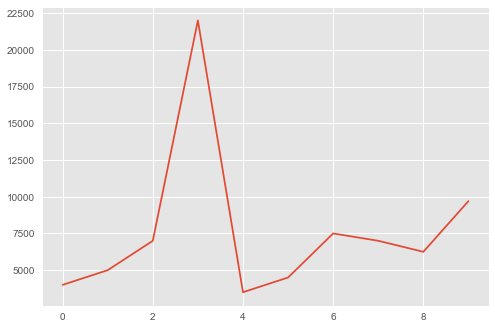

In [45]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [46]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

matplotlib.axes._subplots.AxesSubplot

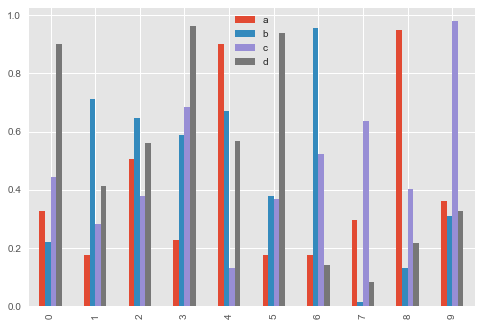

In [47]:
ax = df.plot(kind='bar')
type(ax)

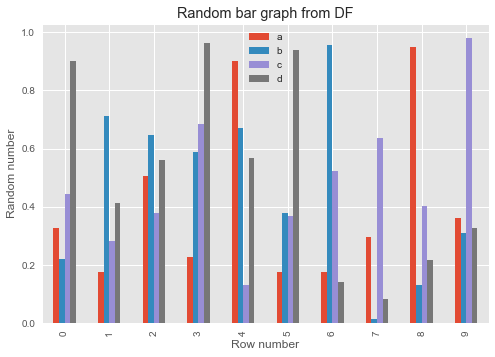

In [48]:
ax = df.plot(kind='bar')
ax.set(title='Random bar graph from DF', xlabel='Row number', ylabel='Random number')
ax.legend().set_visible(True)